In [18]:
import random
import time
import numpy as np
from numpy import random as np_rand
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import matmul as mm
from numpy import argwhere as aw
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score

import kernels as kernel

In [19]:
def krr(X,y,lam,X_t,k):
    # X is training data, y is training labels, X_t is the test data matrix
    # Lam is the tuning parameter for norm fit
    # k is the kernel to use
    N = X.shape[1]
    K = np.zeros((N,N))
    
    # Generate the training K matrix
    start_train = time.time()
    for ii in range(N):
        for jj in range(N):
            K[ii,jj] = k(X[:,ii],X[:,jj])
    
    t_train = time.time() - start_train
    
    N_t = X_t.shape[1]
    K_t = np.zeros((N,N_t))
    # Generate test K matrix
    start_test = time.time()
    for ii in range(N):
        for jj in range(N_t):
            K_t[ii,jj] = k(X[:,ii],X_t[:,jj])
    
    # Classify test data - minimum of cost function    
    y_t = mm(y,mm(inv((K+lam*np.identity(N))),K_t))
    t_test = time.time() - start_test
    return y_t, t_train, t_test

# Try KRR on simulated data

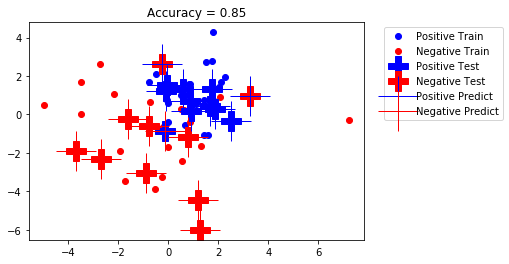

In [20]:
# Set number of training data
nPlus = 20
nMinus = 20

# Create training data
xPlus = np_rand.normal(1,1,(2,nPlus))
xMinus = np_rand.normal(-1,2,(2,nMinus))
x = np.hstack((xPlus,xMinus))
y = np.hstack(([1]*nPlus,[-1]*nMinus))

# Test data
nPlus_t = 10
nMinus_t = 10

xPlus_t = np_rand.normal(1,1,(2,nPlus_t))
xMinus_t = np_rand.normal(-1,2,(2,nMinus_t))
x_t = np.hstack((xPlus_t,xMinus_t))
y_t = np.hstack(([1]*nPlus_t,[-1]*nMinus_t))

# Peform KRR to get label estimates
# Tuning parameter for norm
lam = 0.05
y_e, tmp, tmp = krr(x,y,lam,x_t,kernel.linear)

# predictions
prePlus  = np.argwhere(y_e>=0)
preMinus = np.argwhere(y_e<0)

y_e[preMinus]=-1
y_e[prePlus]=1

# performance
rate = accuracy_score(y_t,y_e)

# Plot training data, test data, and predictions
plt.title("Accuracy = %s"%(rate))
plt.plot(xPlus[0,:],xPlus[1,:],'bo',label='Positive Train')
plt.plot(xMinus[0,:],xMinus[1,:],'ro',label='Negative Train')
plt.plot(xPlus_t[0,:],xPlus_t[1,:],'bP',markersize=20,label='Positive Test')
plt.plot(xMinus_t[0,:],xMinus_t[1,:],'rP',markersize=20,label='Negative Test')
plt.plot(x_t[0,prePlus],x_t[1,prePlus],'+b',markersize=40,label='Positive Predict')
plt.plot(x_t[0,preMinus],x_t[1,preMinus],'+r',markersize=40,label='Negative Predict')
plt.legend(loc='upper right',bbox_to_anchor=(1.43, 1.0));
#plt.legend('Positive Train','Negative Train','Positive Test','Negative Test','Positive Predict','Negative Predict')

# Try KRR on MNIST data

In [4]:
#load the MNIST data set
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = np.array(list(map(int,y)))

In [5]:
zeros  = X[y==0]
other  = X[y!=0]

ones   = X[y==1]
twos   = X[y==2]
threes = X[y==3]
fours  = X[y==4]
fives  = X[y==5]
sixes  = X[y==6]
sevens = X[y==7]
eights = X[y==8]
nines  = X[y==9]

# All possible indices for X
zeros_ind = list(range(0,len(zeros),1))
ones_ind  = list(range(0,len(ones),1))
other_ind = list(range(0,len(other),1))

### Plot performance and training/test time vs. training set size

Training size: 100.  Accuracy: 0.975. T_train: 0.09. T_test: 0.09.
Training size: 200.  Accuracy: 0.805. T_train: 0.35. T_test: 0.19.
Training size: 300.  Accuracy: 0.915. T_train: 0.82. T_test: 0.31.
Training size: 400.  Accuracy: 0.985. T_train: 1.50. T_test: 0.51.
Training size: 500.  Accuracy: 0.97. T_train: 2.31. T_test: 0.57.
Training size: 600.  Accuracy: 0.985. T_train: 3.38. T_test: 0.67.
Training size: 700.  Accuracy: 0.975. T_train: 4.63. T_test: 0.71.
Training size: 800.  Accuracy: 0.97. T_train: 6.10. T_test: 0.92.
Training size: 900.  Accuracy: 0.98. T_train: 7.62. T_test: 1.19.
Training size: 1000.  Accuracy: 0.99. T_train: 9.49. T_test: 1.19.


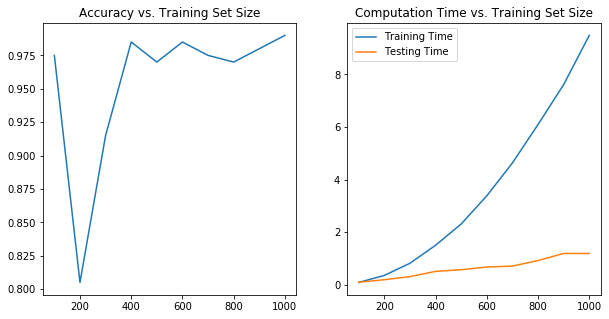

In [15]:
random.seed(2)
train_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
accr = []
t_tr = []
t_ts = []
use_ones = True
for n_tr in train_size:
    # Random sample of the data for a given length
    z_tr_ind = random.sample(zeros_ind,n_tr)
    zeros_tr = zeros[z_tr_ind].transpose()
    # Number of test points
    
    n_t = 100
    # Random sample of test data 
    z_t_ind = random.sample(zeros_ind,n_t)
    zeros_t = zeros[z_t_ind].transpose()

    if use_ones:
        o_tr_ind = random.sample(ones_ind,n_tr)
        other_tr = ones[o_tr_ind].transpose()
        o_t_ind  = random.sample(ones_ind,n_t)
        other_t  = ones[o_t_ind].transpose()

    else:
        o_tr_ind = random.sample(other_ind,n_tr)
        other_tr = other[o_tr_ind].transpose()
        o_t_ind  = random.sample(other_ind,n_t)
        other_t  = other[o_t_ind].transpose()

    # Training data and labels
    x_tr = np.hstack((zeros_tr,other_tr))
    y_tr = np.hstack(([0]*n_tr,[1]*n_tr))

    x_t = np.hstack((zeros_t,other_t))
    y_t = np.hstack(([0]*n_t,[1]*n_t))

    y_e, t_train, t_test = krr(x_tr,y_tr,lam,x_t,kernel.linear)

    y_e[y_e<=0.5] = 0
    y_e[y_e>0.5]  = 1

    rate = accuracy_score(y_t,y_e)
    accr.append(rate)
    t_tr.append(t_train)
    t_ts.append(t_test)
    print("Training size: %s.  Accuracy: %s. T_train: %.2f. T_test: %.2f."
          %(n_tr,rate,t_train,t_test))

plt.figure(figsize=(10,5))
plt.subplot(121) 
plt.title("Accuracy vs. Training Set Size")
plt.plot(train_size,accr,label='Accuracy')
# plt.ylim(0,1)
plt.subplot(122)
plt.title("Computation Time vs. Training Set Size")
plt.plot(train_size,t_tr,label='Training Time')
plt.plot(train_size,t_ts,label='Testing Time')
plt.legend();